<a href="https://colab.research.google.com/github/proubaud/TP_VAE_2020/blob/master/TP_VAE_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [0]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import numpy as np
import IPython.display
import PIL
import matplotlib.pyplot as plt

# GLOBAL PARAMETERS

In [0]:
BATCH_SIZE = ___ # 16, 32, 64, 128, 256
EPOCHS = ___ # between 2 and 50 :)
LEARNING_RATE = ___ # between 1e-1 and 1e-5

LOG_INTERVAL = 10 

# DATA LOADING

In [0]:
#container for training data
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size= ___ , shuffle=True)

#container for testing data
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train= ___ , transform=transforms.ToTensor()),
    batch_size= ___ , shuffle=True)

Files already downloaded and verified


# MODEL DEFINITION

In [0]:
class VAE(nn.Module):

    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear( ___ , 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, ___ )

    # Defines the path through the model
    # Encode --> Reparametrize --> Decode
    def forward(self, x):
        mu, logvar = self. ___ (x.view(-1, ___ ))
        z = self. ___ (mu, logvar)
        return self. ___ (z), mu, logvar

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

In [0]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):

    BCE = F.binary_cross_entropy(recon_x, x.view(-1, ___ ), reduction='sum')

    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # KLD = -0.5 * sum(1 + logvar - mu^2 - logvar.exp())

    KLD = ___

    return BCE + KLD

In [0]:
# Model and optimizer definition
model = ___
optimizer = optim.Adam(model.parameters(), lr= ___ )

In [0]:
def train(epoch):

    #call the train method of the model then reset the train_loss
    ___
    ___

    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)

        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        
        optimizer.step()
        
        if batch_idx % LOG_INTERVAL == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

In [0]:
def test(epoch):

    #call the eval method of the model then reset the test_loss
    ___
    ___
    
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
          
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if(i<5):
              img = data
              output = model(img)
              img=img[0].permute(1,2,0)
              img -= img.min()
              img /= img.max()
              print(recon_batch.shape)
              output_img=recon_batch.view(-1,3,32,32)
              output_img=output_img[0].permute(1,2,0)
              print(output_img.shape)
              plt.imshow(img)
              plt.show()
              plt.imshow(output_img)
              plt.show()

    # divide the test_loss by the len of the test dataset 
    test_loss /= len( ___ )
    print('====> Test set loss: {:.4f}'.format(test_loss))

# MAIN LOOP

Train Epoch: 1 [0/50000 (0%)]	Loss: 2152.088135
Train Epoch: 1 [640/50000 (1%)]	Loss: 2115.773438
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2108.112061
Train Epoch: 1 [1920/50000 (4%)]	Loss: 2035.383545
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2009.306152
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2018.841309
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2004.181763
Train Epoch: 1 [4480/50000 (9%)]	Loss: 2016.024414
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1985.288086
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1976.615723
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1994.565063
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1991.178345
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1955.504761
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1926.331909
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1957.930542
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1920.218628
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1977.095337
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1933.599854
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1941.861694
Train Epoch: 1 [12160

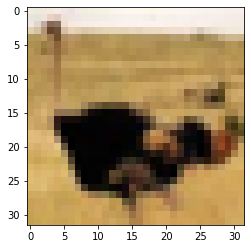

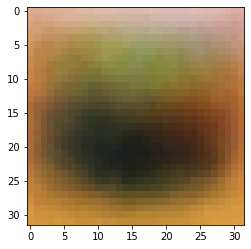

torch.Size([192, 1024])
torch.Size([32, 32, 3])


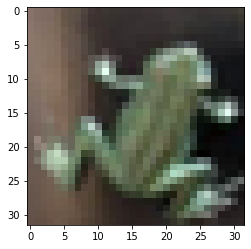

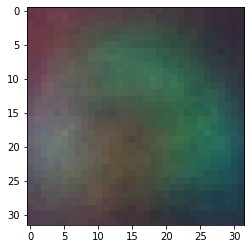

torch.Size([192, 1024])
torch.Size([32, 32, 3])


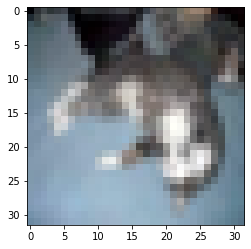

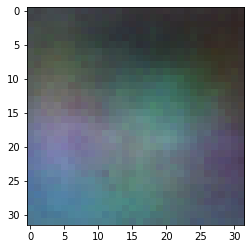

torch.Size([192, 1024])
torch.Size([32, 32, 3])


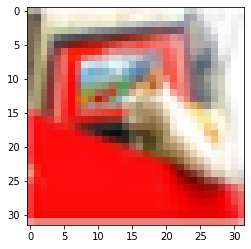

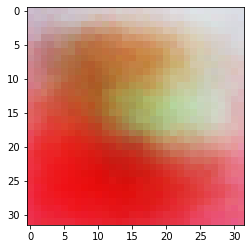

torch.Size([192, 1024])
torch.Size([32, 32, 3])


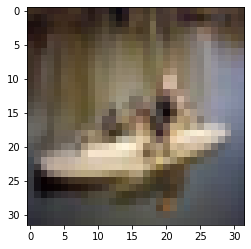

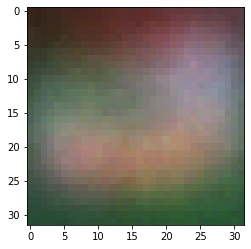

====> Test set loss: 1890.1216
Train Epoch: 2 [0/50000 (0%)]	Loss: 1902.826904
Train Epoch: 2 [640/50000 (1%)]	Loss: 1874.574707
Train Epoch: 2 [1280/50000 (3%)]	Loss: 1870.026367
Train Epoch: 2 [1920/50000 (4%)]	Loss: 1911.127319
Train Epoch: 2 [2560/50000 (5%)]	Loss: 1864.501587
Train Epoch: 2 [3200/50000 (6%)]	Loss: 1863.040527
Train Epoch: 2 [3840/50000 (8%)]	Loss: 1890.779785
Train Epoch: 2 [4480/50000 (9%)]	Loss: 1873.312134
Train Epoch: 2 [5120/50000 (10%)]	Loss: 1943.071533
Train Epoch: 2 [5760/50000 (12%)]	Loss: 1902.086426
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1888.124023
Train Epoch: 2 [7040/50000 (14%)]	Loss: 1898.699585
Train Epoch: 2 [7680/50000 (15%)]	Loss: 1863.111206
Train Epoch: 2 [8320/50000 (17%)]	Loss: 1920.062134
Train Epoch: 2 [8960/50000 (18%)]	Loss: 1891.480103
Train Epoch: 2 [9600/50000 (19%)]	Loss: 1884.758057
Train Epoch: 2 [10240/50000 (20%)]	Loss: 1910.958374
Train Epoch: 2 [10880/50000 (22%)]	Loss: 1906.398193
Train Epoch: 2 [11520/50000 (23%)]	Loss: 18

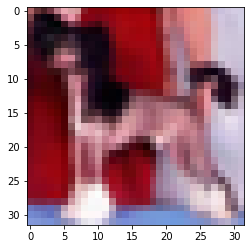

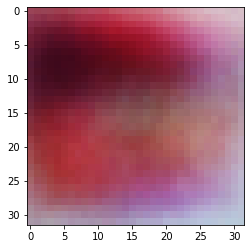

torch.Size([192, 1024])
torch.Size([32, 32, 3])


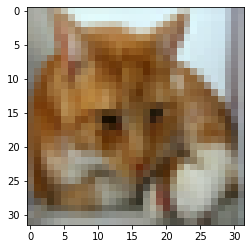

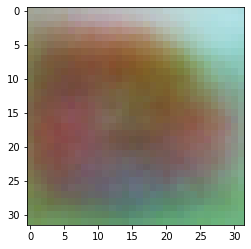

torch.Size([192, 1024])
torch.Size([32, 32, 3])


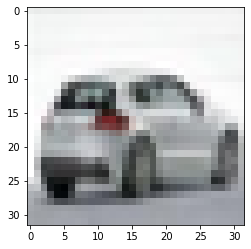

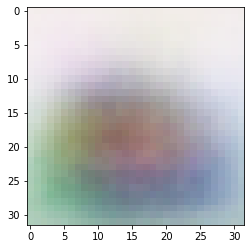

torch.Size([192, 1024])
torch.Size([32, 32, 3])


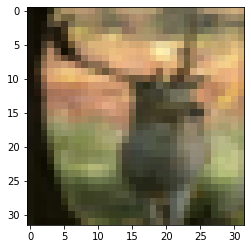

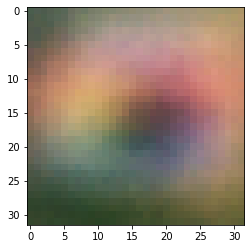

torch.Size([192, 1024])
torch.Size([32, 32, 3])


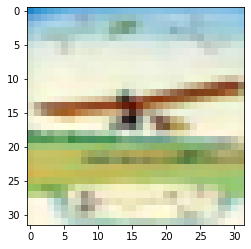

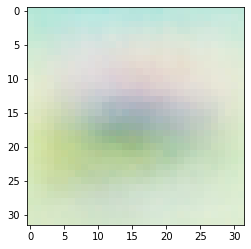

====> Test set loss: 1884.4625
Train Epoch: 3 [0/50000 (0%)]	Loss: 1891.876221
Train Epoch: 3 [640/50000 (1%)]	Loss: 1878.307373
Train Epoch: 3 [1280/50000 (3%)]	Loss: 1849.587402
Train Epoch: 3 [1920/50000 (4%)]	Loss: 1849.062988
Train Epoch: 3 [2560/50000 (5%)]	Loss: 1922.700317
Train Epoch: 3 [3200/50000 (6%)]	Loss: 1849.899414
Train Epoch: 3 [3840/50000 (8%)]	Loss: 1880.020508
Train Epoch: 3 [4480/50000 (9%)]	Loss: 1888.712891
Train Epoch: 3 [5120/50000 (10%)]	Loss: 1898.024658
Train Epoch: 3 [5760/50000 (12%)]	Loss: 1834.264038
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1886.461182
Train Epoch: 3 [7040/50000 (14%)]	Loss: 1917.555664
Train Epoch: 3 [7680/50000 (15%)]	Loss: 1894.364868
Train Epoch: 3 [8320/50000 (17%)]	Loss: 1824.910889
Train Epoch: 3 [8960/50000 (18%)]	Loss: 1906.741699
Train Epoch: 3 [9600/50000 (19%)]	Loss: 1891.755249
Train Epoch: 3 [10240/50000 (20%)]	Loss: 1873.508301
Train Epoch: 3 [10880/50000 (22%)]	Loss: 1876.937012
Train Epoch: 3 [11520/50000 (23%)]	Loss: 18

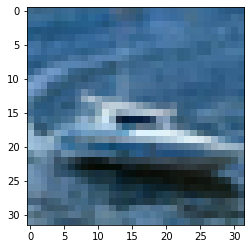

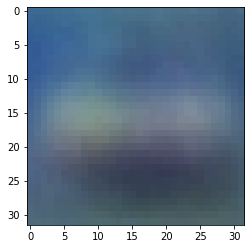

torch.Size([192, 1024])
torch.Size([32, 32, 3])


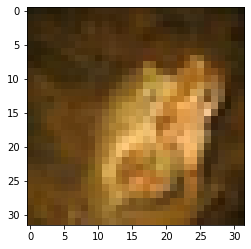

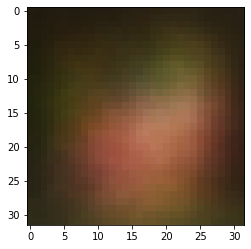

torch.Size([192, 1024])
torch.Size([32, 32, 3])


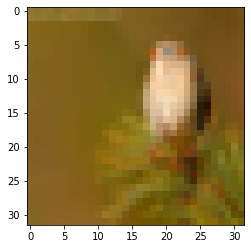

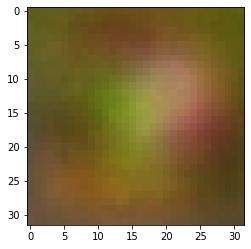

torch.Size([192, 1024])
torch.Size([32, 32, 3])


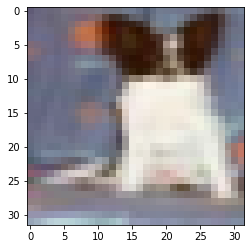

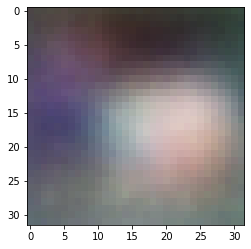

torch.Size([192, 1024])
torch.Size([32, 32, 3])


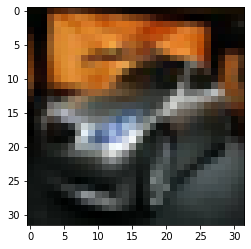

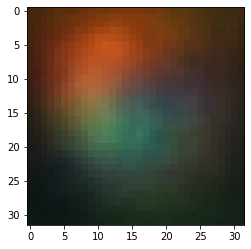

====> Test set loss: 1887.9947
Train Epoch: 4 [0/50000 (0%)]	Loss: 1841.345215
Train Epoch: 4 [640/50000 (1%)]	Loss: 1903.233765
Train Epoch: 4 [1280/50000 (3%)]	Loss: 1875.828491
Train Epoch: 4 [1920/50000 (4%)]	Loss: 1876.164307
Train Epoch: 4 [2560/50000 (5%)]	Loss: 1856.787231
Train Epoch: 4 [3200/50000 (6%)]	Loss: 1876.429443
Train Epoch: 4 [3840/50000 (8%)]	Loss: 1915.081299
Train Epoch: 4 [4480/50000 (9%)]	Loss: 1866.476562
Train Epoch: 4 [5120/50000 (10%)]	Loss: 1874.082764
Train Epoch: 4 [5760/50000 (12%)]	Loss: 1926.494141
Train Epoch: 4 [6400/50000 (13%)]	Loss: 1865.674316
Train Epoch: 4 [7040/50000 (14%)]	Loss: 1871.119995
Train Epoch: 4 [7680/50000 (15%)]	Loss: 1894.712280
Train Epoch: 4 [8320/50000 (17%)]	Loss: 1827.346191
Train Epoch: 4 [8960/50000 (18%)]	Loss: 1829.407227
Train Epoch: 4 [9600/50000 (19%)]	Loss: 1893.258545
Train Epoch: 4 [10240/50000 (20%)]	Loss: 1890.587524
Train Epoch: 4 [10880/50000 (22%)]	Loss: 1873.793701
Train Epoch: 4 [11520/50000 (23%)]	Loss: 18

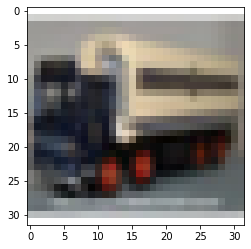

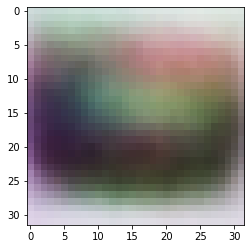

torch.Size([192, 1024])
torch.Size([32, 32, 3])


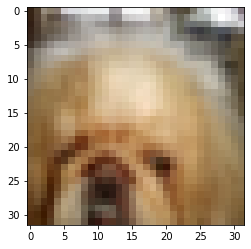

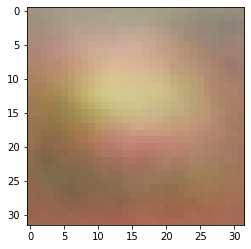

torch.Size([192, 1024])
torch.Size([32, 32, 3])


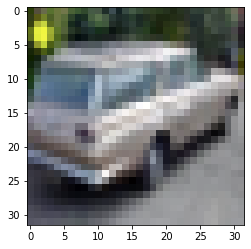

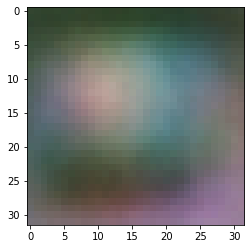

torch.Size([192, 1024])
torch.Size([32, 32, 3])


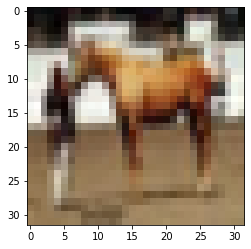

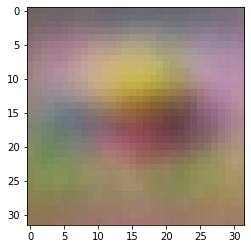

torch.Size([192, 1024])
torch.Size([32, 32, 3])


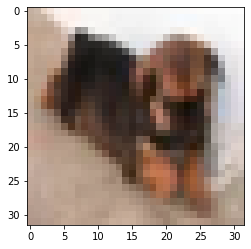

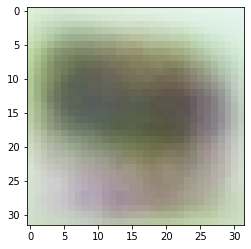

====> Test set loss: 1874.9879
Train Epoch: 5 [0/50000 (0%)]	Loss: 1872.498779
Train Epoch: 5 [640/50000 (1%)]	Loss: 1916.139038
Train Epoch: 5 [1280/50000 (3%)]	Loss: 1873.287598
Train Epoch: 5 [1920/50000 (4%)]	Loss: 1895.483643
Train Epoch: 5 [2560/50000 (5%)]	Loss: 1904.656250
Train Epoch: 5 [3200/50000 (6%)]	Loss: 1878.882568
Train Epoch: 5 [3840/50000 (8%)]	Loss: 1882.177612
Train Epoch: 5 [4480/50000 (9%)]	Loss: 1861.909790
Train Epoch: 5 [5120/50000 (10%)]	Loss: 1872.038818
Train Epoch: 5 [5760/50000 (12%)]	Loss: 1908.369385
Train Epoch: 5 [6400/50000 (13%)]	Loss: 1818.384766
Train Epoch: 5 [7040/50000 (14%)]	Loss: 1884.142456
Train Epoch: 5 [7680/50000 (15%)]	Loss: 1893.822510
Train Epoch: 5 [8320/50000 (17%)]	Loss: 1865.239136
Train Epoch: 5 [8960/50000 (18%)]	Loss: 1889.446045
Train Epoch: 5 [9600/50000 (19%)]	Loss: 1909.677612
Train Epoch: 5 [10240/50000 (20%)]	Loss: 1869.174927
Train Epoch: 5 [10880/50000 (22%)]	Loss: 1890.070435
Train Epoch: 5 [11520/50000 (23%)]	Loss: 18

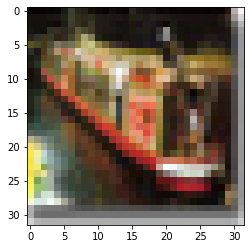

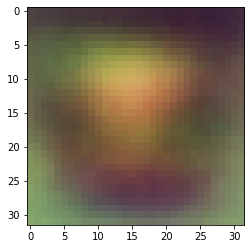

torch.Size([192, 1024])
torch.Size([32, 32, 3])


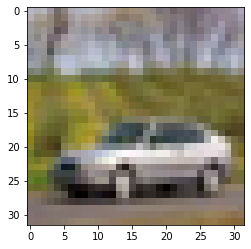

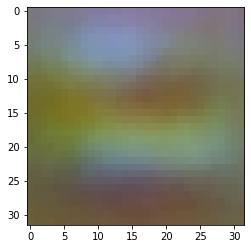

torch.Size([192, 1024])
torch.Size([32, 32, 3])


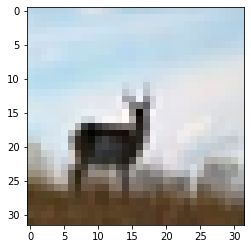

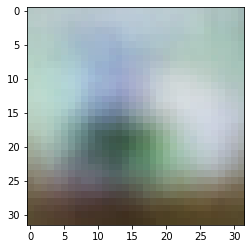

torch.Size([192, 1024])
torch.Size([32, 32, 3])


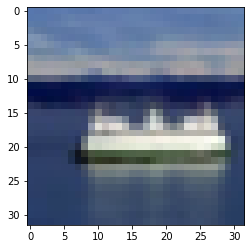

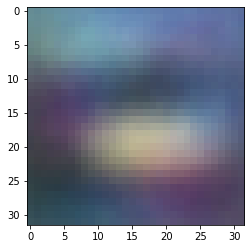

torch.Size([192, 1024])
torch.Size([32, 32, 3])


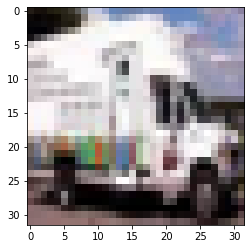

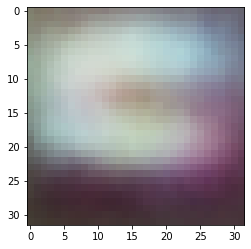

====> Test set loss: 1877.4957


In [0]:
# main loop : calls the two main functions of the program
for epoch in range(1, EPOCHS + 1):
    ___
    ___

# the loop should display, for every epoch, a bunch of images associated with the reproduction made by the model